In [1]:
import os
import sys

import numpy as np
import pandas as pd
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns

# Random Seeds
SEED=3093453
np.random.seed(SEED)



# Cosmetics
np.set_printoptions(
    edgeitems=30,
    linewidth=100_000,
    suppress=True
    )

sns.set(
    context="talk",
    style="darkgrid"
)


cwd = os.getcwd()
cwd, _ = os.path.split(cwd)

In [2]:


df = pd.DataFrame(columns = ["Set", "Filename", "raw"])


#for Set in ["A", "B", "C"]:
for Set in ["X", "X-FIXED"]:
    path = os.path.join(cwd, "data", Set)
    for dirpath, dirnames, filenames in os.walk(path):
        filenames = sorted(filenames)
        for filename in filenames:
            if not filename.endswith(".out"):
                continue
            filepath = os.path.join(dirpath, filename)
            #print(filename)
            with open(filepath, "r") as f:
                raw_text = f.read()
            
            data = pd.DataFrame([[Set, filename[:-4], raw_text]], columns = ["Set", "Filename", "raw"])
            df = pd.concat([df, data])


#df = df[df.Filename.str.contains(r"[A-Z][A-Z]\d?\-\d{1,3}")]

#df = df[df["Filename"].str.len() >3]
df
df["Threshold"] = df["Filename"].str.extract("\-(\d*)").astype(float)

df["Instance"] = df["Filename"].str.split("-").str[0]
df = df.sort_values(["Set", "Filename"]).reset_index(drop=True)

df

,Set,Filename,raw,Threshold,Instance
0,X,AS,"cpu-bind=MASK - cn-0002, task 0 0 [2204321]:...",NaN,AS
1,X,AS-0,"cpu-bind=MASK - cn-0142, task 0 0 [3234793]:...",0.0,AS
2,X,AS-10,"cpu-bind=MASK - cn-0140, task 0 0 [3622505]:...",10.0,AS
3,X,AS-100,"cpu-bind=MASK - cn-0100, task 0 0 [3560115]:...",100.0,AS
4,X,AS-20,"cpu-bind=MASK - cn-0206, task 0 0 [2294212]:...",20.0,AS
...,...,...,...,...,...
2185,X-FIXED,VA5-90-2,"cpu-bind=MASK - cn-0172, task 0 0 [5898]: ma...",90.0,VA5
2186,X-FIXED,VA5-95,"cpu-bind=MASK - cn-0013, task 0 0 [1147861]:...",95.0,VA5
2187,X-FIXED,VA5-95-0,"cpu-bind=MASK - cn-0167, task 0 0 [3466525]:...",95.0,VA5
2188,X-FIXED,VA5-95-1,"cpu-bind=MASK - cn-0171, task 0 0 [1535594]:...",95.0,VA5


In [3]:
df = df[(df["Set"] == "X")&(df["Threshold"].isnull()) | (df["Set"] == "X-FIXED")&(~df["Threshold"].isnull())]
df.head()

,Set,Filename,raw,Threshold,Instance
0,X,AS,"cpu-bind=MASK - cn-0002, task 0 0 [2204321]:...",NaN,AS
12,X,AS2,"cpu-bind=MASK - cn-0256, task 0 0 [978147]: ...",NaN,AS2
24,X,AS3,"cpu-bind=MASK - cn-0214, task 0 0 [2414625]:...",NaN,AS3
36,X,AS4,"cpu-bind=MASK - cn-0245, task 0 0 [3948989]:...",NaN,AS4
48,X,AS5,"cpu-bind=MASK - cn-0202, task 0 0 [588995]: ...",NaN,AS5


In [4]:
df["finalObjective"] = df.raw.str.extract("Final Solution\nObjective;(\d*\.?\d?)\nTransportation cost;").astype(float)
df["finalTransportationCost"] = df.raw.str.extract("Final Solution\nObjective;\d*\.?\d?\nTransportation cost;(\d*\.?\d?)").astype(float)
df["finalInventoryCost"] = df.raw.str.extract(
    "Final Solution\nObjective;\d*\.?\d?\nTransportation cost;\d*\.?\d?\nInventory cost;(\d*\.?\d?)"
).astype(float)
df["Runtime"] = df.raw.str.extract(
    "Final Solution\nObjective;\d*\.?\d?\nTransportation cost;\d*\.?\d?\nInventory cost;\d*\.?\d?\nRuntime;(\d*\.?\d?)"
).astype(float)
#df["finalObjective"].hist()

/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_50932/505975397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["finalObjective"] = df.raw.str.extract("Final Solution\nObjective;(\d*\.?\d?)\nTransportation cost;").astype(float)
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_50932/505975397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["finalTransportationCost"] = df.raw.str.extract("Final Solution\nObjective;\d*\.?\d?\nTransportation cost;(\d*\.?\d?)").astype(float)
/v

In [5]:
num_LNS_iterations = df["raw"].str.extractall(r"LNS iteration (\d*)").astype(int).reset_index().groupby("level_0")[0].max()

In [6]:
num_LNS_iterations = df["raw"].str.extractall(r"LNS iteration (\d*)").astype(int).reset_index().groupby("level_0")[0].max()
#num_LNS_iterations.index.name=
num_LNS_iterations.name = "num_LNS_iter"
df = df.join(num_LNS_iterations)
df["num_LNS_iter"] = df["num_LNS_iter"].fillna(0).astype(int)

In [7]:
df.head()

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter
0,X,AS,"cpu-bind=MASK - cn-0002, task 0 0 [2204321]:...",NaN,AS,2017343.0,1942200.0,75143.0,3590.9,3
12,X,AS2,"cpu-bind=MASK - cn-0256, task 0 0 [978147]: ...",NaN,AS2,2173535.0,2043600.0,129935.0,3595.7,3
24,X,AS3,"cpu-bind=MASK - cn-0214, task 0 0 [2414625]:...",NaN,AS3,9809539.0,9706500.0,103039.0,3597.4,3
36,X,AS4,"cpu-bind=MASK - cn-0245, task 0 0 [3948989]:...",NaN,AS4,2048455.0,1975500.0,72955.0,3596.1,3
48,X,AS5,"cpu-bind=MASK - cn-0202, task 0 0 [588995]: ...",NaN,AS5,2217620.0,2084700.0,132920.0,3594.9,3


In [8]:
reference_df = df[df.Threshold.isnull()].copy()
df = df[~df.Threshold.isnull()].copy().reset_index(drop=True)
df["Threshold"] = df["Threshold"].astype(int)
df.head()

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter
0,X-FIXED,AS4-0,"cpu-bind=MASK - cn-0067, task 0 0 [3547397]:...",0,AS4,2367134.0,2292900.0,74234.0,3590.2,1
1,X-FIXED,AS4-10,"cpu-bind=MASK - cn-0068, task 0 0 [4096684]:...",10,AS4,2111081.0,2037000.0,74081.0,3594.4,2
2,X-FIXED,AS4-100,"cpu-bind=MASK - cn-0236, task 0 0 [2142287]:...",100,AS4,1952845.0,1880700.0,72145.0,2506.7,15
3,X-FIXED,AS4-20,"cpu-bind=MASK - cn-0206, task 0 0 [2431747]:...",20,AS4,2117465.0,2045400.0,72065.0,3595.3,2
4,X-FIXED,AS4-30,"cpu-bind=MASK - cn-0207, task 0 0 [3929820]:...",30,AS4,2008912.0,1934100.0,74812.0,3480.9,4


In [9]:
print(reference_df[reference_df.Instance == "TA4"]["raw"].item())

cpu-bind=MASK - cn-0128, task  0  0 [3792918]: mask |--------------------||||--------BBBBBBBB----|  set
Python 3.10.6
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)
Copyright (c) 2022, Gurobi Optimization, LLC
started at Sun Jan 14 16:13:55 CET 2024
####################################################################################################
####################################################################################################
Start ROADEF
Set parameter TokenServer to value "license3.uni-paderborn.de"
Solve instance TA4 with a warm start and tight groups.
####################################################################################################
####################################################################################################
Time for optimization 3600.0 (s)
####################################################################################################
Data read
Took 	00:00:00.839
########################################

In [10]:
df = df.merge(
    reference_df[["Set", "Instance", "finalTransportationCost", "finalInventoryCost", "finalObjective", "Runtime", "num_LNS_iter"]],
    how="left",
    on=[#"Set",
        "Instance"],
    suffixes=("", "_Reference"),
    
)
df.head()

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter,Set_Reference,finalTransportationCost_Reference,finalInventoryCost_Reference,finalObjective_Reference,Runtime_Reference,num_LNS_iter_Reference
0,X-FIXED,AS4-0,"cpu-bind=MASK - cn-0067, task 0 0 [3547397]:...",0,AS4,2367134.0,2292900.0,74234.0,3590.2,1,X,1975500.0,72955.0,2048455.0,3596.1,3
1,X-FIXED,AS4-10,"cpu-bind=MASK - cn-0068, task 0 0 [4096684]:...",10,AS4,2111081.0,2037000.0,74081.0,3594.4,2,X,1975500.0,72955.0,2048455.0,3596.1,3
2,X-FIXED,AS4-100,"cpu-bind=MASK - cn-0236, task 0 0 [2142287]:...",100,AS4,1952845.0,1880700.0,72145.0,2506.7,15,X,1975500.0,72955.0,2048455.0,3596.1,3
3,X-FIXED,AS4-20,"cpu-bind=MASK - cn-0206, task 0 0 [2431747]:...",20,AS4,2117465.0,2045400.0,72065.0,3595.3,2,X,1975500.0,72955.0,2048455.0,3596.1,3
4,X-FIXED,AS4-30,"cpu-bind=MASK - cn-0207, task 0 0 [3929820]:...",30,AS4,2008912.0,1934100.0,74812.0,3480.9,4,X,1975500.0,72955.0,2048455.0,3596.1,3


In [11]:
df["Subset"] = "Training"
df.loc[(df.Set.str.contains("X")) & (df.Instance.str.endswith("4") | df.Instance.str.endswith("5")), "Subset"] = "Validation"
df.loc[(df.Set.str.contains("X")) & (df.Instance.str.endswith("6") | df.Instance.str.endswith("7")), "Subset"] = "Testing"

In [12]:
df = df[(df["Subset"] == "Validation")]

In [13]:
clms = df.columns

for clm in clms[clms.str.contains("_Reference")]:
    clm_clean = clm.split("_Reference")[0]
    if df[clm].dtype == "O":
        continue
    df[clm_clean] = df[clm_clean] / df[clm]

df.head()

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter,Set_Reference,finalTransportationCost_Reference,finalInventoryCost_Reference,finalObjective_Reference,Runtime_Reference,num_LNS_iter_Reference,Subset
0,X-FIXED,AS4-0,"cpu-bind=MASK - cn-0067, task 0 0 [3547397]:...",0,AS4,1.155570,1.160668,1.017531,0.998359,0.333333,X,1975500.0,72955.0,2048455.0,3596.1,3,Validation
1,X-FIXED,AS4-10,"cpu-bind=MASK - cn-0068, task 0 0 [4096684]:...",10,AS4,1.030572,1.031131,1.015434,0.999527,0.666667,X,1975500.0,72955.0,2048455.0,3596.1,3,Validation
2,X-FIXED,AS4-100,"cpu-bind=MASK - cn-0236, task 0 0 [2142287]:...",100,AS4,0.953326,0.952012,0.988897,0.697061,5.000000,X,1975500.0,72955.0,2048455.0,3596.1,3,Validation
3,X-FIXED,AS4-20,"cpu-bind=MASK - cn-0206, task 0 0 [2431747]:...",20,AS4,1.033689,1.035383,0.987801,0.999778,0.666667,X,1975500.0,72955.0,2048455.0,3596.1,3,Validation
4,X-FIXED,AS4-30,"cpu-bind=MASK - cn-0207, task 0 0 [3929820]:...",30,AS4,0.980696,0.979043,1.025454,0.967965,1.333333,X,1975500.0,72955.0,2048455.0,3596.1,3,Validation


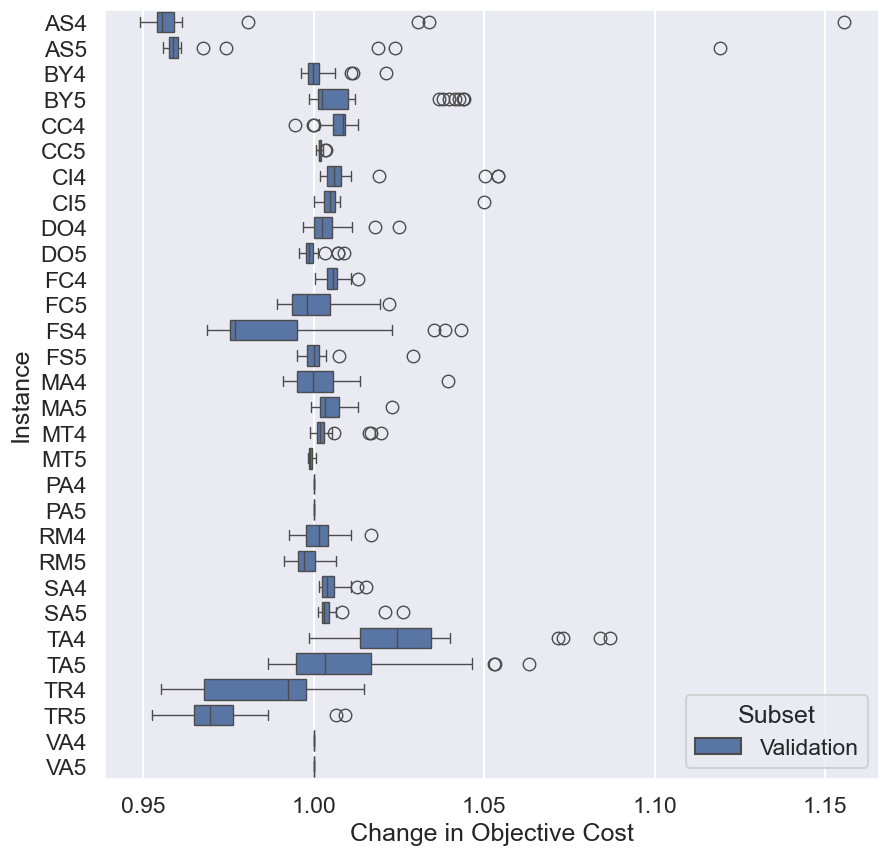

In [14]:
plt.figure(figsize=(10, 10))
#sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Set");
sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Subset");
plt.xlabel("Change in Objective Cost");

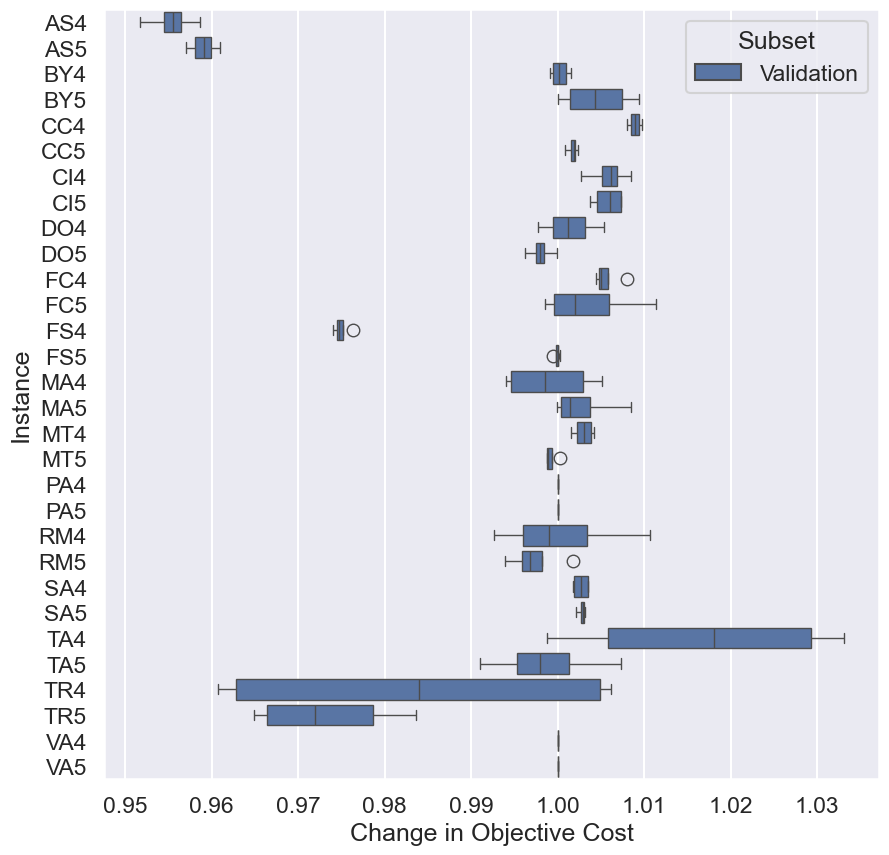

In [92]:
plt.figure(figsize=(10, 10))
#sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Set");
sns.boxplot(data=df[df["Threshold"] == 80], y="Instance", x="finalObjective", hue="Subset");
plt.xlabel("Change in Objective Cost");

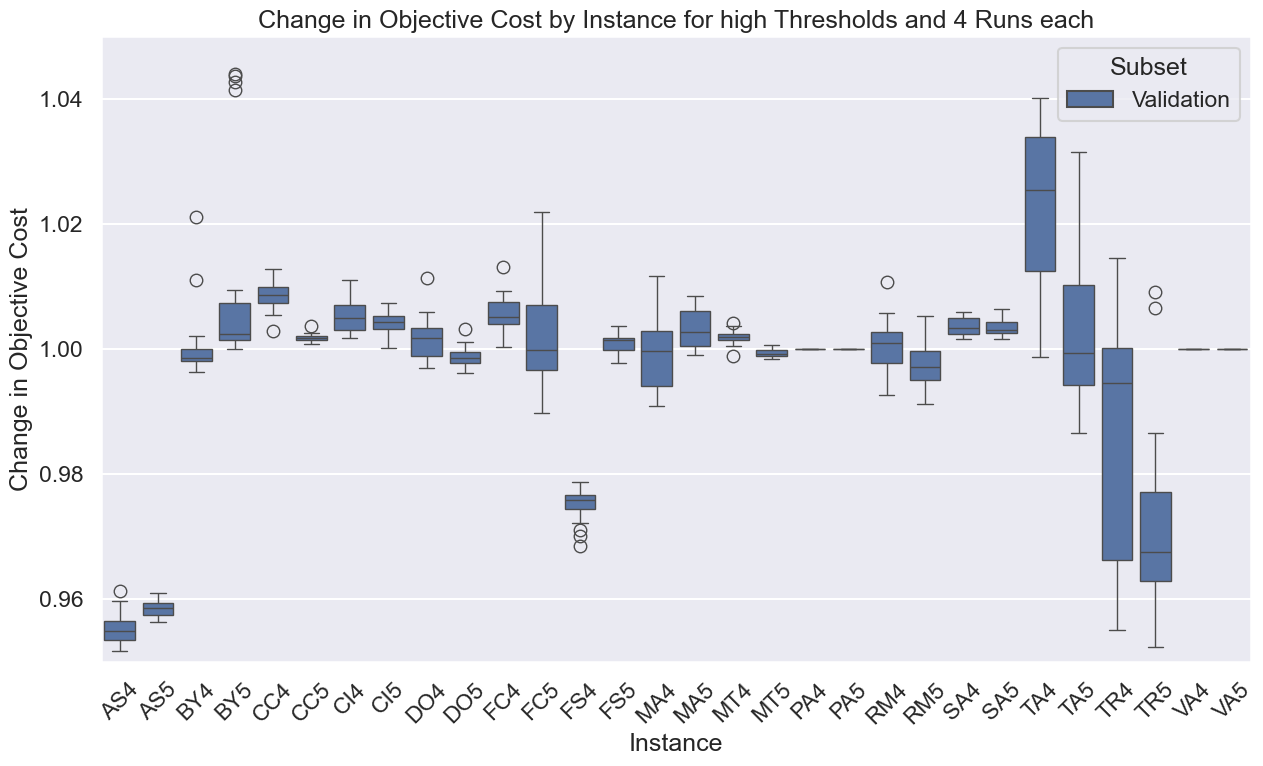

In [104]:
plt.figure(figsize=(13, 8))

#sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Set");
sns.boxplot(data=df[(70<df.Threshold)&(df.Threshold< 100)], x="Instance", y="finalObjective", hue="Subset");
#sns.boxplot(data=df[(df.Threshold==th)], x="Instance", y="finalObjective", hue="Subset");
plt.ylabel("Change in Objective Cost");
plt.title(f"Change in Objective Cost by Instance for high Thresholds and 4 Runs each");
plt.xticks(rotation=45);
plt.ylim([0.95, 1.05])

plt.tight_layout()
for file_format in ["pdf"]:
    #path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"Change in Objective by Instance 70-95.{file_format}")
    path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"Change in Objective by Instance for high Thresholds.{file_format}")
    plt.savefig(path)


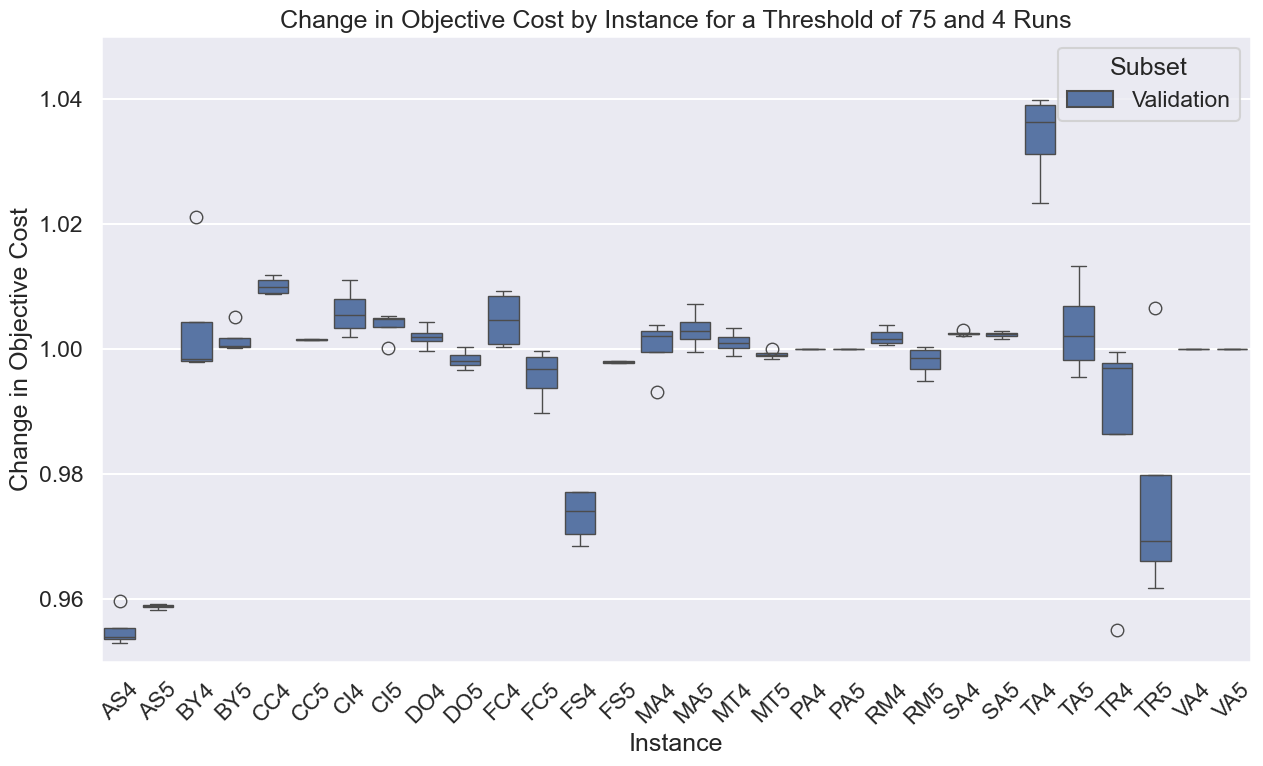

In [102]:
plt.figure(figsize=(13, 8))

th=75
#sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Set");
#sns.boxplot(data=df[(70<df.Threshold)&(df.Threshold< 100)], x="Instance", y="finalObjective", hue="Subset");
sns.boxplot(data=df[(df.Threshold==th)], x="Instance", y="finalObjective", hue="Subset");
plt.ylabel("Change in Objective Cost");
plt.title(f"Change in Objective Cost by Instance for a Threshold of {th} and 4 Runs");
plt.xticks(rotation=45);
plt.ylim([0.95, 1.05])

plt.tight_layout()
for file_format in ["pdf"]:
    #path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"Change in Objective by Instance 70-95.{file_format}")
    path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"Change in Objective by Instance{th}.{file_format}")
    plt.savefig(path)


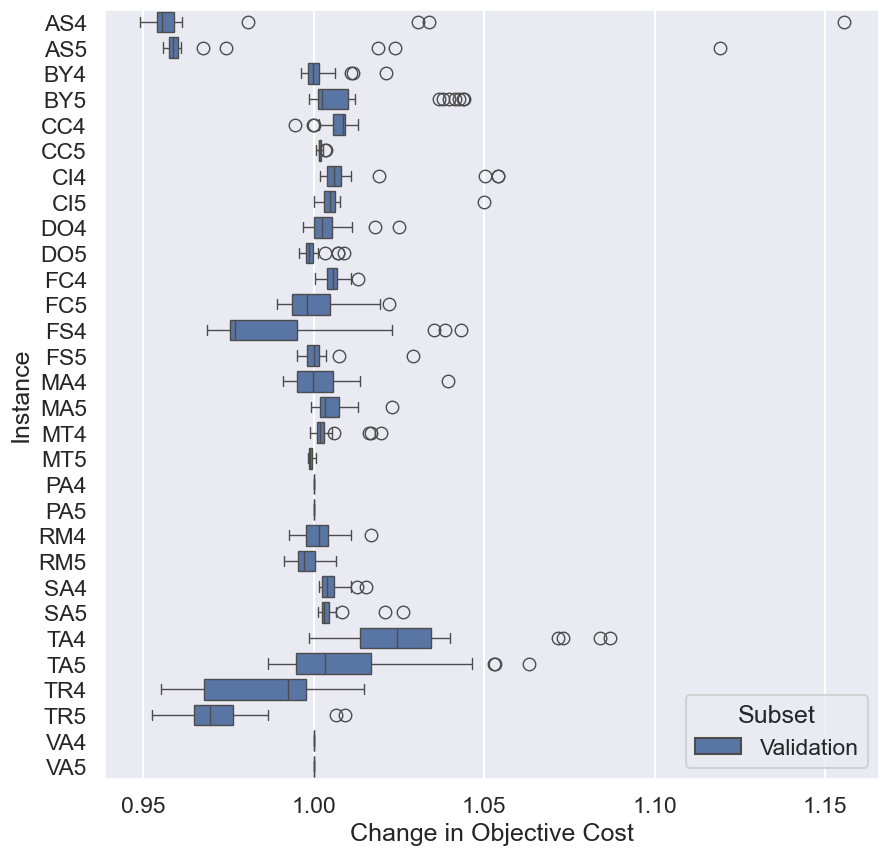

In [19]:
plt.figure(figsize=(10, 10))
#sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Set");
sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Subset");
plt.xlabel("Change in Objective Cost");

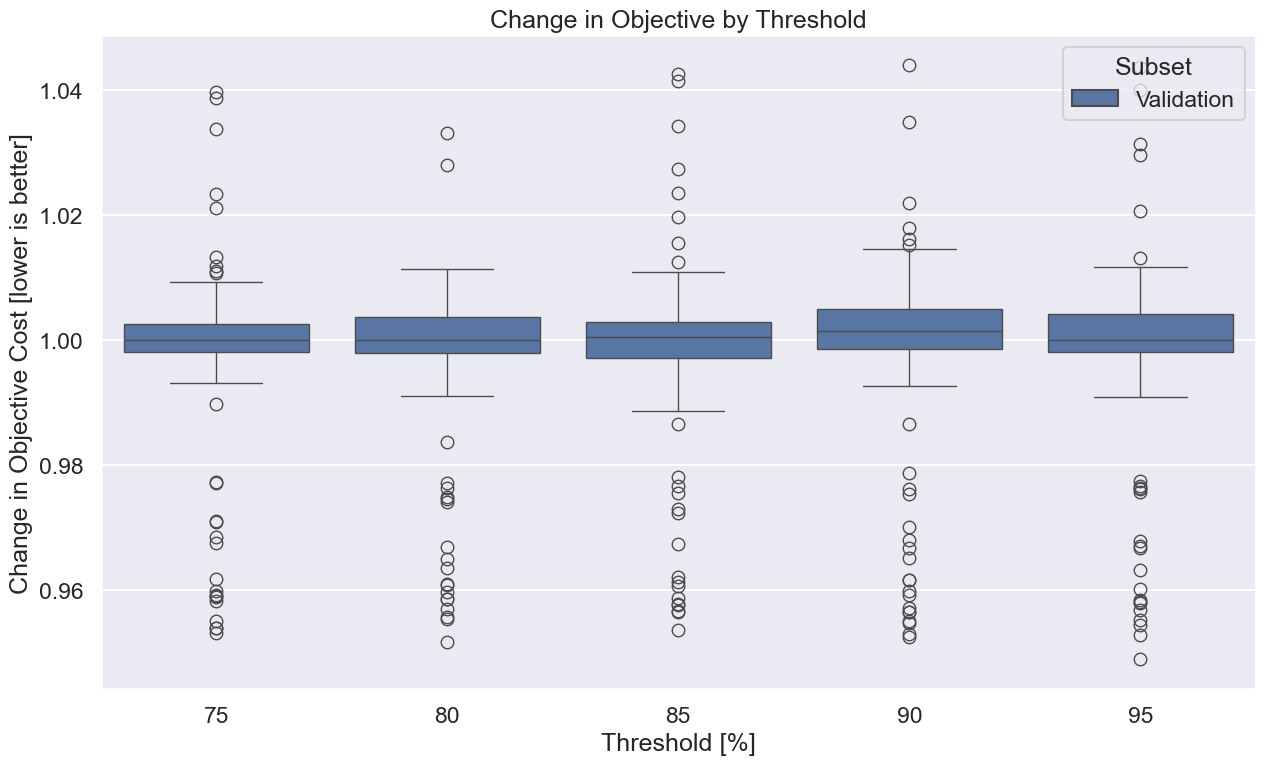

In [39]:
plt.figure(figsize=(13, 8))
sns.boxplot(data=df[(70<df.Threshold)&(df.Threshold< 100)], y="finalObjective", x="Threshold", hue="Subset");
plt.xlabel("Threshold [%]")
plt.ylabel("Change in Objective Cost [lower is better]");
plt.title("Change in Objective by Threshold")

plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"Change in Objective by Threshold.{file_format}")
    plt.savefig(path)


In [21]:
df.groupby("Threshold")[["finalObjective"]].agg(["mean", "std", "count"])

finalObjective                
                    mean       std count
Threshold                               
0               1.020806  0.038515    30
10              1.010922  0.023593    30
20              1.013318  0.023399    30
30              1.004465  0.020903    30
40              1.001810  0.014271    30
50              1.000998  0.017243    29
60              0.998430  0.013219    30
70              0.996464  0.014441   120
75              0.997412  0.015644   120
80              0.996815  0.014731   120
85              0.997982  0.015373   120
90              0.997503  0.016566   119
95              0.997275  0.016394   119
100             1.000027  0.014707    30

In [74]:
import statsmodels.api as sm


#X = df[(70<df.Threshold)&(df.Threshold< 100)]
X = df.copy()
dummies = pd.get_dummies(X["Instance"])
X[dummies.columns] = dummies.astype(int)
X = X.dropna(axis=0)

y = X["finalObjective"]
X = X[["Threshold"]+dummies.columns.to_list()]
X["Threshold^2"] = X["Threshold"]**2
X

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         finalObjective   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     38.50
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          9.68e-130
Time:                        09:42:23   Log-Likelihood:                 2545.0
No. Observations:                 861   AIC:                            -5032.
Df Residuals:                     832   BIC:                            -4894.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9855      0.002    570.974      0.000       0.982       0.989
Threshold      -0.0006   7.13e-05     -9.087      0.000      -0.001      -0.001
AS4             0.0043      0.002      1.955      0.051   -1.74e-05       0.009
AS5             0.0051      0.002      2.314      0.021       0.001       0.010
BY4             0.0381      0.002     17.161      0.000       0.034       0.043
BY5             0.0480      0.002     21.604      0.000       0.044       0.052
CC4             0.0443      0.002     19.946      0.000       0.040       0.049
CC5             0.0388      0.002     17.460      0.000       0.034       0.043
CI4             0.0474      0.002     21.321      0.000       0.043       0.052
CI5             0.0429      0.002     19.287      0.000       0.039       0.047
DO4             0.0408      0.002     18.348      0.000       0.036       0.045
DO5             0.0364      0.002     16.354      0.000       0.032       0.041
FC4             0.0424      0.002     19.055      0.000       0.038       0.047
FC5             0.0374      0.002     16.814      0.000       0.033       0.042
FS4             0.0255      0.002     11.466      0.000       0.021       0.030
FS5             0.0378      0.002     16.983      0.000       0.033       0.042
MA4             0.0388      0.002     17.472      0.000       0.034       0.043
MA5             0.0421      0.002     18.938      0.000       0.038       0.046
MT4             0.0404      0.002     18.178      0.000       0.036       0.045
MT5             0.0362      0.002     16.289      0.000       0.032       0.041
PA4             0.0370      0.002     16.663      0.000       0.033       0.041
PA5          4.794e-14   6.68e-15      7.176      0.000    3.48e-14    6.11e-14
RM4             0.0386      0.002     17.350      0.000       0.034       0.043
RM5             0.0348      0.002     14.945      0.000       0.030       0.039
SA4             0.0422      0.002     18.966      0.000       0.038       0.047
SA5             0.0417      0.002     18.746      0.000       0.037       0.046
TA4             0.0661      0.002     29.738      0.000       0.062       0.070
TA5             0.0466      0.002     20.943      0.000       0.042       0.051
TR4             0.0227      0.002     10.200      0.000       0.018       0.027
TR5             0.0091      0.002      4.102      0.000       0.005       0.013
VA4                  0          0        nan        nan           0           0
VA5                  0          0        nan        nan           0           0
Threshold^2  4.144e-06   6.49e-07      6.388      0.000    2.87e-06    5.42e-06
==============================================================================
Omnibus:                      869.166   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarqu

In [79]:
model.params[["Threshold", "Threshold^2"]]

Threshold     -0.000648
Threshold^2    0.000004
dtype: float64

In [86]:
#-0.000648x + 0.000004x^2

for x in [70, 75, 80, 85, 90, 95]:
    print(-0.000648 + 0.000008*x)

-8.800000000000008e-05
-4.800000000000008e-05
-8.000000000000086e-06
3.199999999999991e-05
7.199999999999991e-05
0.0001119999999999999


In [22]:
print(df.loc[df["Filename"] == "RM5-50", "raw"].item())

cpu-bind=MASK - cn-0073, task  0  0 [2730862]: mask |--------BBBBBBBB----||||--------------------|  set
Not a conda environment: /pc2/users/d/dwetzel/.conda/envs/ROADEF
Python 3.9.12
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)
Copyright (c) 2022, Gurobi Optimization, LLC
started at Fri Apr 19 17:34:58 CEST 2024
2024-04-19 17:34:59.418803: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 17:34:59.455169: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 17:34:59.455232: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 17:34:59.455265: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register 

In [23]:
from scipy.stats import norm, t

t_value = (0.995017-1) /(0.017117/29**0.5)
print(t_value)

t.cdf(t_value, df=29-1)

-1.5676973905445473


0.06409250666448368

In [24]:
x = df.finalObjective[df.Threshold == 90]
x = x[~x.isnull()]

t_value = (1-x.mean()) / x.std() * len(x)**0.5
t_value

1.6443582418924214

In [25]:
from scipy.stats import t

t.pdf(t_value, df=len(x)-1)

0.10340675012693386

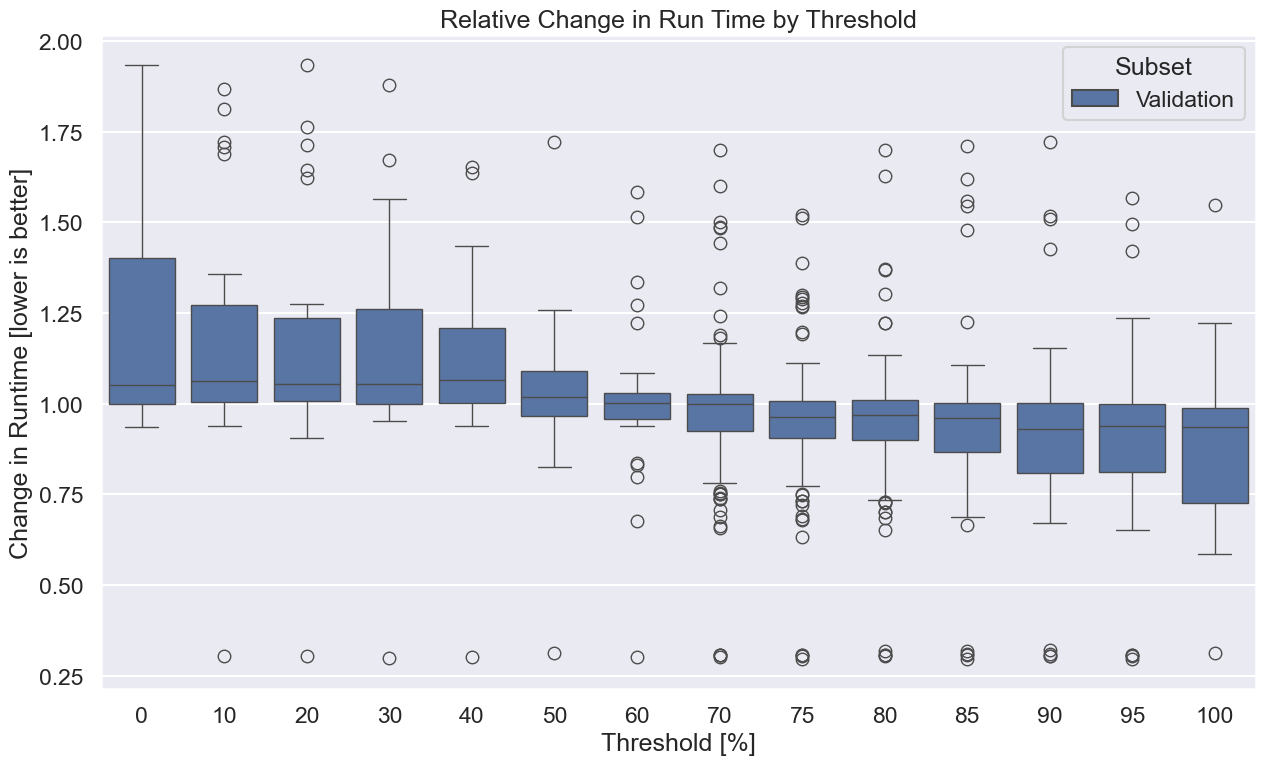

In [26]:
plt.figure(figsize=(13, 8))
sns.boxplot(data=df, y="Runtime", x="Threshold", hue="Subset");
plt.xlabel("Threshold [%]")
plt.ylabel("Change in Runtime [lower is better]");
plt.title("Relative Change in Run Time by Threshold")


plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"Change in Runtime by Threshold VALIDATION.{file_format}")
    plt.savefig(path)

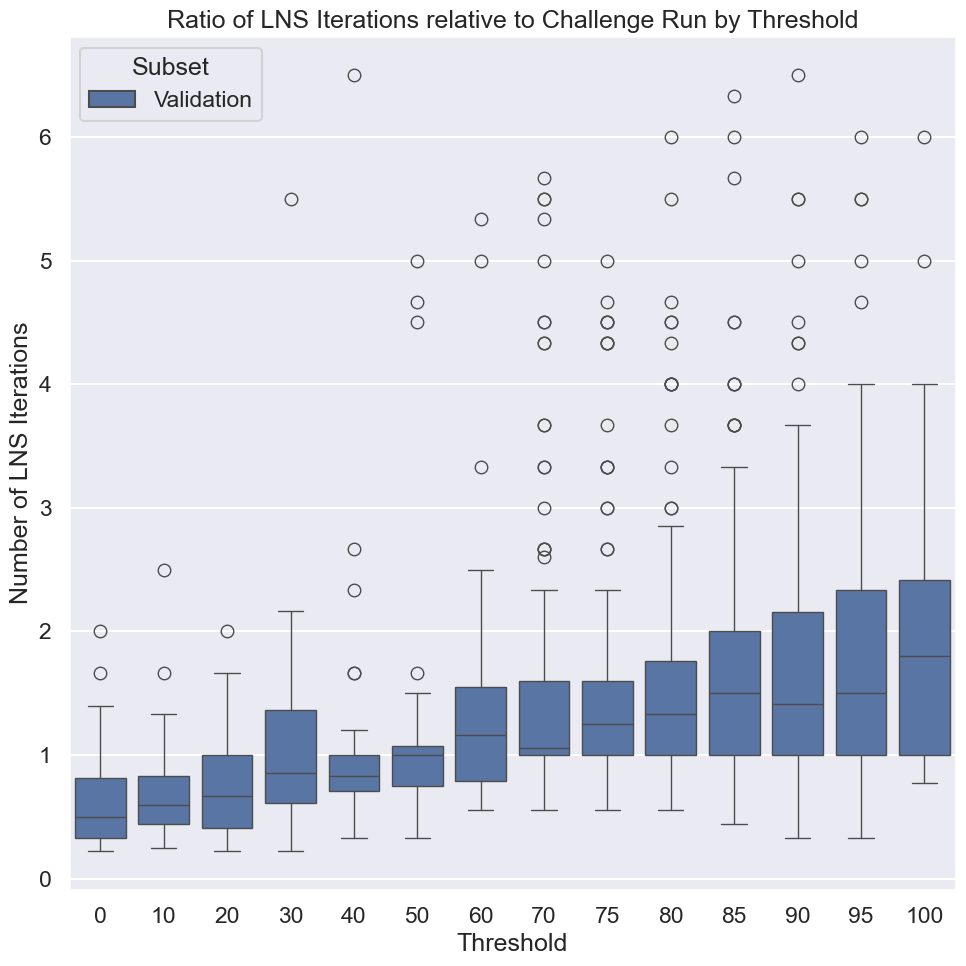

In [27]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, y="num_LNS_iter", x="Threshold", hue="Subset");
plt.ylabel("Number of LNS Iterations");
plt.title("Ratio of LNS Iterations relative to Challenge Run by Threshold");
plt.tight_layout()

In [28]:
reference_df[(reference_df.Set == "A")&(reference_df.Instance == "BU")]

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter


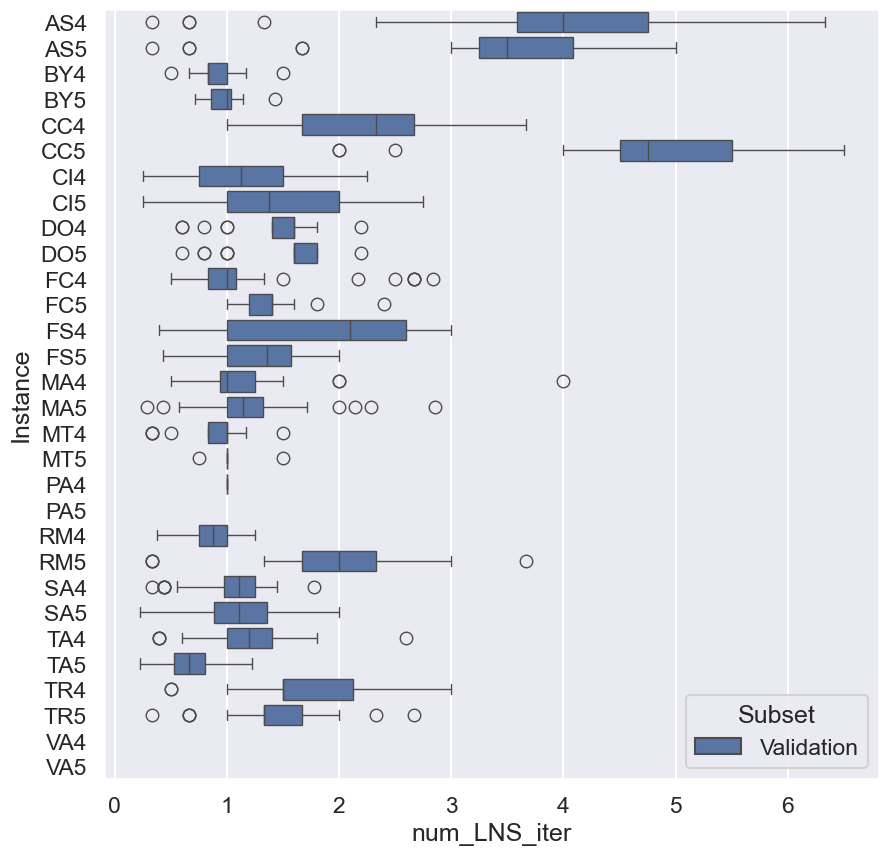

In [29]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, y="Instance", x="num_LNS_iter", hue="Subset");
#plt.ylabel("Change in Runtime");

## Crosstable Model / Area

In [30]:
idx = df[(df.Instance == "TA4")& (df.Threshold==80)]#.index.item()
idx

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter,Set_Reference,finalTransportationCost_Reference,finalInventoryCost_Reference,finalObjective_Reference,Runtime_Reference,num_LNS_iter_Reference,Subset
784,X-FIXED,TA4-80,"cpu-bind=MASK - cn-0171, task 0 0 [1509387]:...",80,TA4,1.033124,1.033271,1.018526,0.901185,1.2,X,964800.0,9716.0,974516.0,2986.4,5,Validation
785,X-FIXED,TA4-80-0,"cpu-bind=MASK - cn-0234, task 0 0 [3354751]:...",80,TA4,1.028075,1.027985,1.037052,0.987008,0.8,X,964800.0,9716.0,974516.0,2986.4,5,Validation
786,X-FIXED,TA4-80-1,"cpu-bind=MASK - cn-0236, task 0 0 [2169526]:...",80,TA4,1.008126,1.008396,0.981371,1.100388,1.6,X,964800.0,9716.0,974516.0,2986.4,5,Validation
787,X-FIXED,TA4-80-2,"cpu-bind=MASK - cn-0237, task 0 0 [3155440]:...",80,TA4,0.998748,0.998134,1.059695,1.015638,1.2,X,964800.0,9716.0,974516.0,2986.4,5,Validation


In [31]:
tab = (
    df["raw"]
    .str.extractall("Model Prediction: (\d\.\d*)-Neuer Approach: .*?\n-Packed Area\s*:(\d\.\d*)-Alter Approach:")
    .astype(float)
    .reset_index()
    .drop("match", axis=1)
    .rename({
        "level_0": "Instance",
        0: "Prediction",
        1: "AreaRatio",
    },axis=1)
)
tab.head()

,Instance,Prediction,AreaRatio


In [32]:
sub_tab = tab.loc[tab.Instance == idx]

fig, ax = plt.subplots(2, figsize=(10, 10))

sns.histplot(data=sub_tab, x="Prediction", bins=np.arange(-0.1, 1.1, 0.05),ax=ax[0]);
sns.histplot(data=sub_tab, x="AreaRatio", bins=np.arange(-0.1, 1.1, 0.05),ax=ax[1]);

ax[0].set(ylabel="Prediction", xlim=[0, 1])
ax[1].set(ylabel="AreaRation", xlim=[0, 1]);

plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-12-ExperimentsThreshold-DEBUG", f"TA4-Prediction+AreaRatio.{file_format}")
    plt.savefig(path)
    pass

ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.

In [ ]:
sns.scatterplot(data=sub_tab, x="AreaRatio", y="Prediction", alpha=0.5);

In [ ]:
crosstab = pd.crosstab((sub_tab["Prediction"] > 0.8), (sub_tab["AreaRatio"] < .9))
crosstab[True] = 0
crosstab

In [ ]:
crosstab = pd.crosstab((tab["Prediction"] > 0.8), (tab["AreaRatio"] < .9), normalize=True)
(crosstab*100).round(1)

In [ ]:
stacks = df["raw"].str.extractall("\nStack (\d*) with items:")\
    .reset_index()\
    .set_index("level_0")\
    .astype({0: int})
stacks

In [ ]:
stack_counts = stacks[0].value_counts().sort_index(ascending=True).diff(-1)

#plt.bar(stack_counts.index, stack_counts);
stack_counts#.index.max()

In [ ]:
prediction_times = (
    df["raw"]
    .str.extractall("Time spent for prediction: (\d\.\d*) for Batch of (\d*) truck plans")
    .reset_index()
    .rename({"level_0": "Instance",
             "match": "LNS-Iteration",
             0: "InferenceTime",
             1: "numTrucks"},
            axis=1)
    .astype({"InferenceTime": float,
             "numTrucks": int})
)

TA4_index = df[df.Instance=="TA4"].index

prediction_times[ np.isin(prediction_times.Instance, TA4_index)]

sns.regplot(
    data = prediction_times[ np.isin(prediction_times.Instance, TA4_index)],
    x = "numTrucks",
    y = "InferenceTime",
    #logx=True
)
plt.xlabel("Number of Trucks")
plt.ylabel("Inference Time [s]");
plt.title("Inference Time by Truck count for Instance X-TA4");

plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"TA4-InferenceTime.{file_format}")
    plt.savefig(path)
    pass

In [ ]:
sns.regplot(data=df.loc[TA4_index], x="Threshold", y="finalObjective");
#sns.regplot(data=df.loc[TA4_index], x="Threshold", y="finalTransportationCost");
#sns.regplot(data=df.loc[TA4_index], x="Threshold", y="finalInventoryCost");

plt.xlabel("Threshold [%]")
#plt.ylabel("Inference Time [s]");
plt.title("Final Objective by Threshold for Instance X-TA4");


plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"TA4-ObjectiveByThreshold.{file_format}")
    plt.savefig(path)
    pass

In [ ]:
print(df.loc[TA4_index]["raw"][274])

In [ ]:
sns.regplot(data=df.loc[TA4_index], x="Threshold", y="num_LNS_iter");
plt.ylabel("LNS Iterations")
plt.title("Number of LNS Iterations by Threshold\ncompared to TA4 (5 Iterations)")

plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"TA4-LNS_IterByThreshold.{file_format}")
    plt.savefig(path)
    pass

In [ ]:
df

### Compare the number of LNS-Iterations

In [ ]:
LNS_iter_times_reference = (
    reference_df[reference_df.Instance == "TA4"]["raw"]
    .str.extractall("numTrucksRepack:\s*\d*\nRemaining Time:\s*(\d*\.\d*)")
    .astype(float)
    .diff(-1)
)
LNS_iter_times_reference

In [ ]:
LNS_iter_times = (
    df[df.Instance == "TA4"]["raw"]
    .str.extractall("numTrucksRepack:\s*\d*\nRemaining Time:\s*(\d*\.\d*)")
    .astype(float)
    .diff(-1)
)
LNS_iter_times[LNS_iter_times[0]<0] = np.nan
LNS_iter_times.head(7)

In [ ]:

#LNS_iter_times_reference[LNS_iter_times_reference[0]<0] = np.nan

fig, ax = plt.subplots(figsize=(13, 8))
LNS_iter_times.hist(ax=ax, bins=np.arange(0, 750, 50))
LNS_iter_times_reference.hist(ax=ax, bins=np.arange(0, 750, 50))

In [ ]:
LNS_iter_times_reference

In [ ]:
#LNS_iter_times = LNS_iter_times.dropna().reset_index().set_index("level_0").merge(df[["Threshold"]], left_index=True, right_index=True)

LNS_iter_times.groupby("match")[[0]].mean()

In [ ]:
LNS_iter_times[LNS_iter_times.Threshold > 50]

In [ ]:
prediction_times.groupby("Instance")["LNS-Iteration"].max().hist(bins=np.arange(0, 22, 1)-0.5);
plt.xlabel("Number of LNS-Iterations");

In [ ]:
logs = []

path = os.path.join(cwd, "data", "TA4-RERUNS")
for dirpath, dirnames, filenames in os.walk(path):
    filenames = sorted(filenames)
    for filename in filenames:
        if not filename.endswith(".out"):
            continue
        filepath = os.path.join(dirpath, filename)
        #print(filename)
        with open(filepath, "r") as f:
            raw_text = f.read()

        logs.append(raw_text)
        #data = pd.DataFrame([[Set, filename[:-4], raw_text]], columns = ["Set", "Filename", "raw"])
        #df = pd.concat([df, data])
ta4_logs = pl.DataFrame(logs, schema=["raw"])

In [ ]:
final_objectives = (
    ta4_logs["raw"]
    .str.extract("Final Solution\nObjective;(\d*)")
    .cast(int)
    .to_numpy()
)

final_objectives

In [ ]:
from scipy.stats import t

n = final_objectives.shape[0]; print("n:", n)

mu0 = 974516.0

t_value = (final_objectives.mean() - mu0) / (final_objectives.std() / n**0.5)
print("t_value", t_value)

1-t.cdf(t_value, df=(n-1))

In [ ]:
(mu0 - final_objectives.mean()) / final_objectives.std()

In [ ]:
plt.hist(final_objectives, label="Reruns");
plt.axvline(mu0, label="Reference Run", c="tab:red", lw=5);
plt.title("Objective Values for TA4")
plt.xlabel("Objective")
plt.legend();
plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-18-ExperimentsThreshold-FIXED", f"RerunsTA4.{file_format}")
    plt.savefig(path)